# Чуть-чуть математики

Теперь давайте попробуем написать функцию. Например, чтобы приближённо считала синус. Для небольших $x$:

$$\sinh x = x + \frac{x^3}{3!} + \frac{x^5}{5!} + \frac{x^7}{7!} + \ldots + R(x) =
\sum_{n=0}^N  \frac{x^{2n+1}}{(2n+1)!} + R(x),$$

причём $R(x) \xrightarrow[N \rightarrow \infty]{} 0$.

Это частичная сумма т.н. ряда Тейлора:

$$ f(x) = f(a)+\sum_{k=1}^\infty {f^{(k)} (a) \over k!} (x - a)^k. $$

In [11]:
import math

iterations = 20

def my_sh(x):
    """Вычисление шинуса при помощи частичного суммирования ряда Тейлора"""
    x_pow = x
    multiplier = 1
    partial_sum = x
    for n in range(1, iterations):
        x_pow *= x**2  # В цикле постепенно считаем степень
        multiplier *= 1 / (2*n) / (2*n + 1)  # (-1)^n и факториал
        partial_sum += x_pow * multiplier
    
    return partial_sum

print(help(math.sin), math.sinh(0.4))
print(help(my_sin), my_sh(0.4))

Help on built-in function sin in module math:

sin(...)
    sin(x)
    
    Return the sine of x (measured in radians).

None 0.4107523258028155
Help on function my_sin in module __main__:

my_sin(x)
    Вычисление синуса при помощи частичного суммирования ряда Тейлора

None 0.4107523258028155


выходит у нас немного неточно, но зато...

... Зато наша функция умеет считать синус комплексного аргумента, легко достигающий пяти и более в мирное время. Мнимая единица ($i$) в Питоне обозначется, как `j`.

Стандартная библиотека тоже умеет, **и поточнее**.

In [12]:
import math
import cmath
import matplotlib.pyplot as plt
import numpy as np

complex_angle = cmath.asinh(5)
print('"Угол", на котором шинус достигает пяти:', complex_angle)

print("Достигает ли пяти наш шинус?", my_sh(complex_angle))
print("А библиотечный?", cmath.sinh(complex_angle))

"Угол", на котором шинус достигает пяти: (2.3124383412727525+0j)
Достигает ли пяти наш шинус? (5+0j)
А библиотечный? (4.999999999999999+0j)


А какое и где слабое место у нашего синуса?

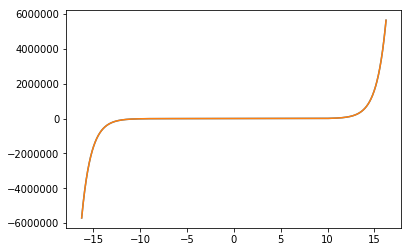

In [13]:
%matplotlib inline

angles = np.r_[-16.25:16.25:0.01]
plt.plot(angles, np.sinh(angles))
plt.plot(angles, np.vectorize(my_sh)(angles))
plt.show()